# Twitter APIv2 Example

More info here:

- https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/introduction

    - https://github.com/twitterdev/Twitter-API-v2-sample-code/blob/master/Tweet-Lookup/get_tweets_with_bearer_token.py

In [1]:
import requests
import os
import json
import pandas as pd
# To set your enviornment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'
# Alternatively I hardcode below, no real harm in sharing the bearer token I think ...


## Read our 2 CSV AWS Athena export CSVs to a dataframe


In [2]:
csv_exports = []

for item in [item for item in os.listdir('./') if item.endswith('.csv')]:
    csv_exports.append(pd.read_csv('./{}'.format(item)))
    
tweet_df = pd.concat(csv_exports)

In [3]:
tweet_df.shape

(1001, 60)

In [4]:
tweet_df.id.values

array([655009888888684544, 631854264780914688, 641632940623990789, ...,
       806684750547066882, 761023892034957313, 686903485548265472])

## --> TwitterAPIv2 BEARER_TOKEN
- Conveniently I already have Twitter APIv2 creds from another testing project ... 

In [5]:
cat ../../twitter_apiv2/config/config.ini | grep bearer

#bearer_token = [AAAAAAAAAAAAAAAAAAAAAKPmIQEAAAAAKBqIrrv%2BYIQ%2BhzVXmwFBrzVIewU%3Dxx2larQmD1SqZQq6pKY3Jr7dXs4BIeZE6gRAGs0H95vNaAL14Z]


## Run the following python code example:

- This will get public metrics for respective tweet IDs...

- To rebuild the post URL, `https://twitter.com/EpochTimes/status/_TWEET_ID_HERE_`

Tweet files include the following (*you cannot get private metrics!*)

```
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    
```

### LAST NIGHT I HIT THE RATE LIMIT AFTER LIKE 300 TWEETS ... going to trying and fix this

In [8]:
def auth():
    BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAKPmIQEAAAAAKBqIrrv%2BYIQ%2BhzVXmwFBrzVIewU%3Dxx2larQmD1SqZQq6pKY3Jr7dXs4BIeZE6gRAGs0H95vNaAL14Z"
    #return os.environ.get("BEARER_TOKEN")
    return BEARER_TOKEN

def create_url(t_id):
    # Include optional fields of interest
    tweet_fields = "tweet.fields=lang,author_id,conversation_id,created_at,geo,id,in_reply_to_user_id,public_metrics,referenced_tweets,source,text"
    ids = "ids={}".format(t_id)
    # You can adjust ids to include a single Tweets.
    # Or you can add to up to 100 comma-separated IDs
    url = "https://api.twitter.com/2/tweets?{}&{}".format(ids, tweet_fields)
    return url


def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers


def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    elif 
    return response.json()

##################################################

def main():
    
    # Loop through Twitter IDs
    # (maybe not the best idea but this works for 1,000 epochtimes tweets)
    for t_id in tweet_df.id.values:
        
        # Configurations
        bearer_token = auth()
        url = create_url(t_id)
        headers = create_headers(bearer_token)
        
        # Twitter API call
        json_response = connect_to_endpoint(url, headers)
        print(json.dumps(json_response, indent=1, sort_keys=True))
        
        # Export to as raw json
        with open('./data/raw/{}.json'.format(t_id), 'w') as outfile:
            json.dump(json_response, outfile)


if __name__ == "__main__":
    main()

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "655009888888684544",
   "created_at": "2015-10-16T13:18:21.000Z",
   "id": "655009888888684544",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 1
   },
   "source": "dlvr.it",
   "text": "Goal of Getting US Troops out of 2 Wars Eludes Obama http://t.co/MYd3HQCzmz"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "631854264780914688",
   "created_at": "2015-08-13T15:46:10.000Z",
   "id": "631854264780914688",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 1
   },
   "source": "dlvr.it",
   "text": "When to Buy Organic Produce http://t.co/OpVd4Qnumu http://t.co/EO8v9FLM9L"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "641632940623990789",
   "created_at": "2015-09-09T15:23:08.000Z",
   "id": "6416

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "671539611584192513",
   "created_at": "2015-12-01T04:01:34.000Z",
   "id": "671539611584192513",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 2
   },
   "source": "dlvr.it",
   "text": "Ex-Assembly Speaker Convicted at Corruption Trial https://t.co/RNfBudjkAN"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "623294084564676612",
   "created_at": "2015-07-21T00:51:04.000Z",
   "id": "623294084564676612",
   "lang": "en",
   "public_metrics": {
    "like_count": 1,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 0
   },
   "source": "dlvr.it",
   "text": "Will Uber Survive If Its Drivers Are Reclassified as Employees? http://t.co/iD4HwgIwva"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "656591363786477568",
   "created_at": "2015-10-20T22:02:34.000Z",
   

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "614240952027189248",
   "created_at": "2015-06-26T01:17:09.000Z",
   "id": "614240952027189248",
   "lang": "en",
   "public_metrics": {
    "like_count": 1,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 2
   },
   "source": "dlvr.it",
   "text": "When President Obama Stays in New York, He Won\u2019t Stay at the Waldorf-Astoria http://t.co/liQRpIIsdZ http://t.co/31FHyrKvxN"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "664194600936980480",
   "created_at": "2015-11-10T21:35:07.000Z",
   "id": "664194600936980480",
   "lang": "en",
   "public_metrics": {
    "like_count": 1,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 2
   },
   "source": "dlvr.it",
   "text": "Researchers Make Big Discovery at Great Pyramid After Using Thermal Imaging https://t.co/XefPC7SDsL https://t.co/LgLGWUfOZx"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
 

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "643996871313063936",
   "created_at": "2015-09-16T03:56:33.000Z",
   "id": "643996871313063936",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 1
   },
   "source": "dlvr.it",
   "text": "New Computer Learns How to Play Expert-Level Chess in Just 72 Hours http://t.co/F25YpgEZBL"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "659532371989958656",
   "created_at": "2015-10-29T00:49:05.000Z",
   "id": "659532371989958656",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 0
   },
   "source": "dlvr.it",
   "text": "Fed Keeps Rate at Record Low but Will Consider December Hike https://t.co/amrKt40qLm"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "651459506996645892",
   "created_at": "2015-10-06T18:1

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1299758714983981058",
   "created_at": "2020-08-29T17:20:00.000Z",
   "id": "1299758714983981058",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 32
   },
   "referenced_tweets": [
    {
     "id": "1299743620627607555",
     "type": "retweeted"
    }
   ],
   "source": "Buffer",
   "text": "RT @EpochOpinion: Opinion\ud83d\udcadby @RogerLSimon\n\n#Nashville, a blue city, is a financial disaster, while #Tennessee, a red state, is thriving.\n\nT\u2026"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1204125060577005575",
   "created_at": "2019-12-09T19:46:00.000Z",
   "id": "1204125060577005575",
   "lang": "en",
   "public_metrics": {
    "like_count": 280,
    "quote_count": 20,
    "reply_count": 38,
    "retweet_count": 122
   },
   "source": "Buffer",
   "text": "\u201cI think she hates his success. I 

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "793201388570284032",
   "created_at": "2016-10-31T21:22:02.000Z",
   "id": "793201388570284032",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 2
   },
   "source": "dlvr.it",
   "text": "NATO, Russia Will Hold Parallel Drills in the Balkans https://t.co/YuEa6HMDjk"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1288137141684404224",
   "created_at": "2020-07-28T15:40:01.000Z",
   "id": "1288137141684404224",
   "lang": "en",
   "public_metrics": {
    "like_count": 15,
    "quote_count": 1,
    "reply_count": 3,
    "retweet_count": 20
   },
   "source": "Buffer",
   "text": "#Russia sent a Su-27 fighter jet to intercept a @USNavy plane over the neutral waters of the #BlackSea, according to its #Defense ministry.\n\nThe @StateDept has yet to comment on the claims. https://t.co/19GDM92SSY"
  }
 ]
}
200
{

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1281754597963583490",
   "created_at": "2020-07-11T00:58:04.000Z",
   "id": "1281754597963583490",
   "lang": "en",
   "public_metrics": {
    "like_count": 141,
    "quote_count": 4,
    "reply_count": 9,
    "retweet_count": 27
   },
   "source": "Buffer",
   "text": "UPDATE: President Trump has commuted the sentence of longtime associate and former advisor #RogerStone. https://t.co/Uy2CcixAq1"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1282005484459962368",
   "created_at": "2020-07-11T17:35:00.000Z",
   "id": "1282005484459962368",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 30
   },
   "referenced_tweets": [
    {
     "id": "1282000756455944192",
     "type": "retweeted"
    }
   ],
   "source": "Buffer",
   "text": "RT @Miguel_NTD: Surge in retirement filings since May 25, according to @NYP

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1024727313303437314",
   "created_at": "2018-08-01T18:43:24.000Z",
   "id": "1024727313303437314",
   "lang": "en",
   "public_metrics": {
    "like_count": 5,
    "quote_count": 0,
    "reply_count": 1,
    "retweet_count": 1
   },
   "source": "Twitter Web Client",
   "text": "Anti-Islamic Campaigner Tommy Robinson Is Free\u2026 For Now https://t.co/RiSXwNxRkB"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1169357160230379522",
   "created_at": "2019-09-04T21:10:52.000Z",
   "id": "1169357182871187456",
   "in_reply_to_user_id": "29097819",
   "lang": "en",
   "public_metrics": {
    "like_count": 14,
    "quote_count": 1,
    "reply_count": 1,
    "retweet_count": 5
   },
   "referenced_tweets": [
    {
     "id": "1169357181147406336",
     "type": "replied_to"
    }
   ],
   "source": "Twitter Web App",
   "text": "#Roh\u2019s name has recently popped up in the media after US

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1207452997527252992",
   "created_at": "2019-12-19T00:10:02.000Z",
   "id": "1207452997527252992",
   "lang": "en",
   "public_metrics": {
    "like_count": 33,
    "quote_count": 16,
    "reply_count": 69,
    "retweet_count": 15
   },
   "source": "Buffer",
   "text": "\u201cIf we do not act now, we would be derelict in our duty.\u201d\n\n@SpeakerPelosi gave a speech on the House floor and called on her caucus to vote to #ImpeachTrump. https://t.co/6Xg2EXSNAB"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1112801816880799750",
   "created_at": "2019-04-01T19:40:02.000Z",
   "id": "1112801816880799750",
   "lang": "en",
   "public_metrics": {
    "like_count": 41,
    "quote_count": 0,
    "reply_count": 2,
    "retweet_count": 20
   },
   "source": "Buffer",
   "text": "Trump says @nytimes &amp; @washingtonpost should have their 2018 #Pulitzer prize withdrawn in light of the res

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1040052444485566464",
   "created_at": "2018-09-13T01:40:00.000Z",
   "id": "1040052444485566464",
   "lang": "en",
   "public_metrics": {
    "like_count": 10,
    "quote_count": 0,
    "reply_count": 2,
    "retweet_count": 3
   },
   "source": "Buffer",
   "text": "Bernie Sanders' Son Loses in New Hampshire Congressional Primary https://t.co/1dMmtkVK2X"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1296627084039790597",
   "created_at": "2020-08-21T01:56:01.000Z",
   "id": "1296627084039790597",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 82
   },
   "referenced_tweets": [
    {
     "id": "1296599406108725249",
     "type": "retweeted"
    }
   ],
   "source": "Buffer",
   "text": "RT @news_ntd: #Chinatowns Remove Communist Party Flags\n\nIn #SanFrancisco, local Chinese communities are taking dow

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1005854077778055168",
   "created_at": "2018-06-10T16:47:54.000Z",
   "id": "1005854077778055168",
   "lang": "en",
   "public_metrics": {
    "like_count": 1,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 0
   },
   "source": "Twitter for iPhone",
   "text": "U.S. Expands China Health Alert Amid Mysterious Illness Reports https://t.co/KzjvWsg7tp"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1238568160758059010",
   "created_at": "2020-03-13T20:50:35.000Z",
   "id": "1238568160758059010",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 10
   },
   "referenced_tweets": [
    {
     "id": "1238528547255451648",
     "type": "retweeted"
    }
   ],
   "source": "Twitter Web App",
   "text": "RT @news_ntd: \ud83d\udd34WATCH: https://t.co/hwvTqARLJ5\n\u201cAntifa does sound like a great th

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1030260426574110725",
   "created_at": "2018-08-17T01:10:01.000Z",
   "id": "1030260426574110725",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 1,
    "retweet_count": 1
   },
   "source": "Buffer",
   "text": "US Judge Orders Review of Keystone XL Pipeline Route https://t.co/QoUd4fjREn #judge #KeystoneXL #USA"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1197204152792866816",
   "created_at": "2019-11-20T17:24:47.000Z",
   "id": "1197204152792866816",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 37
   },
   "referenced_tweets": [
    {
     "id": "1197202961979625473",
     "type": "retweeted"
    }
   ],
   "source": "Twitter Web App",
   "text": "RT @EpochTimesChina: A former employee of #Britain\u2019s consulate in #HongKong said Chinese se

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1239280278050390019",
   "created_at": "2020-03-15T20:00:17.000Z",
   "id": "1239280278050390019",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 234
   },
   "referenced_tweets": [
    {
     "id": "1239279912122552320",
     "type": "retweeted"
    }
   ],
   "source": "Twitter Web App",
   "text": "RT @BowenXiao_: Chinese citizens are getting fed up with the regime's propaganda efforts to boost its leadership on the #coronavirus outbre\u2026"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1095728453654118401",
   "created_at": "2019-02-13T16:56:35.000Z",
   "id": "1095728453654118401",
   "lang": "en",
   "public_metrics": {
    "like_count": 17,
    "quote_count": 1,
    "reply_count": 5,
    "retweet_count": 19
   },
   "source": "Twitter Web Client",
   "text": "#California\u2019s #DMV confirmed th

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1176677161916424192",
   "created_at": "2019-09-25T01:57:51.000Z",
   "id": "1176677161916424192",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 47
   },
   "referenced_tweets": [
    {
     "id": "1176670906388643840",
     "type": "retweeted"
    }
   ],
   "source": "Twitter Web App",
   "text": "RT @JanJekielek: @RealDrGina @PhyllisSchlafly \"After 10 years\u2026of making phone calls to Planned Parenthoods\u2026one of the Planned Parenthood wo\u2026"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1259889778989957121",
   "created_at": "2020-05-16T22:29:36.000Z",
   "id": "1261785902487085064",
   "in_reply_to_user_id": "29097819",
   "lang": "en",
   "public_metrics": {
    "like_count": 9,
    "quote_count": 0,
    "reply_count": 1,
    "retweet_count": 5
   },
   "referenced_tweets": [
    {
     

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "981266455340683266",
   "created_at": "2018-04-03T20:25:28.000Z",
   "id": "981266455340683266",
   "lang": "en",
   "public_metrics": {
    "like_count": 2,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 0
   },
   "source": "Twitter Web Client",
   "text": "Sessions Assigned a Federal Prosecutor and That\u2019s Better for #Trump Than a 2nd Special Counsel https://t.co/BJzba2jO86 @IvanPentchoukov"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "876934393247420416",
   "created_at": "2017-06-19T22:47:06.000Z",
   "id": "876934393247420416",
   "lang": "en",
   "public_metrics": {
    "like_count": 1,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 0
   },
   "source": "dlvr.it",
   "text": "Panda Mom Nurtures Incredibly Tiny Panda Cub Born in Japanese Zoo https://t.co/sLXqyOv6TE"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "convers

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1229864258676183042",
   "created_at": "2020-02-18T20:27:20.000Z",
   "id": "1229865000933695491",
   "in_reply_to_user_id": "29097819",
   "lang": "en",
   "public_metrics": {
    "like_count": 14,
    "quote_count": 0,
    "reply_count": 1,
    "retweet_count": 15
   },
   "referenced_tweets": [
    {
     "id": "1229864535164624896",
     "type": "replied_to"
    }
   ],
   "source": "Twitter Web App",
   "text": "@FBI @RodRosenstein On Oct. 31, 2016, @Comey had a conversation with #McCabe regarding the @WSJ article. The #IGReport notes that McCabe claims to have admitted to #Comey that he authorized the leak regarding the Aug. 12 conversation, and also admitted he hadn\u2019t informed Comey prior to doing so."
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1204172431059038208",
   "created_at": "2019-12-09T22:54:14.000Z",
   "id": "1204172431059038208",
   "lang": "en",
   "pub

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1225545077503778818",
   "created_at": "2020-02-06T22:21:30.000Z",
   "id": "1225545077503778818",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 16
   },
   "referenced_tweets": [
    {
     "id": "1225517773712957442",
     "type": "retweeted"
    }
   ],
   "source": "Twitter Web App",
   "text": "RT @EpochTimesCan: Government-chartered plane to Canada leaves Wuhan #coronavirus \nhttps://t.co/tSirt27URa"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1324033752734064643",
   "created_at": "2020-11-04T17:00:20.000Z",
   "id": "1324033752734064643",
   "lang": "en",
   "public_metrics": {
    "like_count": 52,
    "quote_count": 7,
    "reply_count": 17,
    "retweet_count": 31
   },
   "source": "Buffer",
   "text": "#Election officials in #Pennsylvania\u2019s Allegheny County announced early Wednesday

200
{
 "errors": [
  {
   "detail": "Sorry, you are not authorized to see the Tweet with ids: [1159137450821857281].",
   "parameter": "ids",
   "resource_type": "tweet",
   "section": "data",
   "title": "Authorization Error",
   "type": "https://api.twitter.com/2/problems/not-authorized-for-resource",
   "value": "1159137450821857281"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1215021614896685056",
   "created_at": "2020-01-08T21:25:01.000Z",
   "id": "1215021614896685056",
   "lang": "en",
   "public_metrics": {
    "like_count": 128,
    "quote_count": 9,
    "reply_count": 2,
    "retweet_count": 106
   },
   "source": "Buffer",
   "text": "11 pages of @StateDept docs released by @JudicialWatch show that Winer used his private email to convey info he received from #ChristopherSteele to top US diplomatic officials.\n\n\u201cNo wonder Jonathan Winer\u2026 refused to talk to the DOJ IG,\u201d said @TomFitton. https://t.co/5YFS0LfzZe"
  }
 ]
}
200

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1007695331067351040",
   "created_at": "2018-06-15T18:44:23.000Z",
   "id": "1007695331067351040",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 0
   },
   "source": "Twitter Web Client",
   "text": "Lake Houston Releasing Water for Rainfall Weekend https://t.co/9dvbGDjRkG"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "903999729456922624",
   "created_at": "2017-09-02T15:15:05.000Z",
   "id": "903999729456922624",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 0
   },
   "source": "dlvr.it",
   "text": "US, South Korea Agree to Revise Missile Treaty in Face of North Korean Threats https://t.co/ALdkig6yXj"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1259353185204023297",
   "created_at": "

200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1202291977787760641",
   "created_at": "2019-12-04T18:21:59.000Z",
   "id": "1202291977787760641",
   "lang": "en",
   "public_metrics": {
    "like_count": 0,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 10
   },
   "referenced_tweets": [
    {
     "id": "1201936138807721987",
     "type": "retweeted"
    }
   ],
   "source": "Twitter Web App",
   "text": "RT @EpochTimesCan: Trump, Trudeau eager to ratify new NAFTA #USMCA #CUSMA \nhttps://t.co/nQ7WtYurEh"
  }
 ]
}
200
{
 "data": [
  {
   "author_id": "29097819",
   "conversation_id": "1310903400167616512",
   "created_at": "2020-09-29T11:25:00.000Z",
   "id": "1310903400167616512",
   "lang": "en",
   "public_metrics": {
    "like_count": 31,
    "quote_count": 4,
    "reply_count": 7,
    "retweet_count": 16
   },
   "source": "Buffer",
   "text": "#California Gov. #GavinNewsom declared a state of emergency in several counties due to several 

Exception: Request returned an error: 429 Rate limit exceeded


### Hit rate limit! 

- I figured the looping was maybe not the best idea ... 

``` 
Exception: Request returned an error: 429 Rate limit exceeded
```

## Let's check on the json outfile for our 2 tests... 

In [16]:
pip install pandas --upgrade

     |████████████████████████████████| 10.4MB 3.3MB/s eta 0:00:01
  Found existing installation: pandas 0.25.1
    Uninstalling pandas-0.25.1:
      Successfully uninstalled pandas-0.25.1
Note: you may need to restart the kernel to use updated packages.


In [9]:
df = 

created_at author_id  \
0  2020-11-13T04:10:00.000Z  29097819   

                                   referenced_tweets      conversation_id  \
0  [{'type': 'retweeted', 'id': '1327026516635639...  1327101382776778753   

  lang                                               text  source  \
0   en  RT @Miguel_NTD: A #GOP poll watcher gave us hi...  Buffer   

                    id  public_metrics.retweet_count  \
0  1327101382776778753                           214   

   public_metrics.reply_count  public_metrics.like_count  \
0                           0                          0   

   public_metrics.quote_count  
0                           0

## Let's open & json_normalize our API results
- I hit a rate limit at 300 tweets ...

In [14]:
data = []

for item in [api_result for api_result in os.listdir('./data/raw/') if api_result.endswith('.json')]:
    data.append(pd.json_normalize(pd.read_json('./data/raw/{}'.format(item)).iloc[0]))
    
json_df = pd.concat(data)

In [18]:
json_df.shape

(308, 20)

In [19]:
json_df.head(4)

created_at author_id  \
0  2020-11-13T04:10:00.000Z  29097819   
0  2019-09-04T21:10:52.000Z  29097819   
0  2018-06-10T16:47:54.000Z  29097819   
0  2020-11-18T14:55:02.000Z  29097819   

                                   referenced_tweets      conversation_id  \
0  [{'type': 'retweeted', 'id': '1327026516635639...  1327101382776778753   
0  [{'type': 'replied_to', 'id': '116935718114740...  1169357160230379522   
0                                                NaN  1005854077778055168   
0                                                NaN  1329075650058088457   

  lang                                               text              source  \
0   en  RT @Miguel_NTD: A #GOP poll watcher gave us hi...              Buffer   
0   en  #Roh’s name has recently popped up in the medi...     Twitter Web App   
0   en  U.S. Expands China Health Alert Amid Mysteriou...  Twitter for iPhone   
0   en  President Trump will be spending #Thanksgiving...              Buffer   

                    id  public_metrics.retweet_count  \
0  1327101382776778753                         214.0   
0  1169357182871187456                           5.0   
0  1005854077778055168                           0.0   
0  1329075650058088457                          34.0   

   public_metrics.reply_count  public_metrics.like_count  \
0                         0.0                        0.0   
0                         1.0                       14.0   
0                         0.0                        1.0   
0                         6.0                      215.0   

   public_metrics.quote_count in_reply_to_user_id value parameter  \
0                         0.0                 NaN   NaN       NaN   
0                         1.0            29097819   NaN       NaN   
0                         0.0                 NaN   NaN       NaN   
0                         2.0                 NaN   NaN       NaN   

  resource_type section title detail type  
0           NaN     NaN   NaN    NaN  NaN  
0           NaN     NaN   NaN    NaN  NaN  
0           NaN     NaN   NaN    NaN  NaN  
0           NaN     NaN   NaN    NaN  NaN

### Ordering by date & time for Data Viz

In [29]:
json_df['created_at'] = json_df.created_at.astype('datetime64')

In [38]:
df = json_df.sort_values('created_at')

In [51]:
df.columns

Index(['created_at', 'author_id', 'referenced_tweets', 'conversation_id',
       'lang', 'text', 'source', 'id', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'in_reply_to_user_id', 'value',
       'parameter', 'resource_type', 'section', 'title', 'detail', 'type'],
      dtype='object')

_______
## We can plot some of the public metric counts to quantify engagement:

### `Public_Metrics.Retweet_Count` over time for EpochTimes AWS Athena Historical Tweet IDs

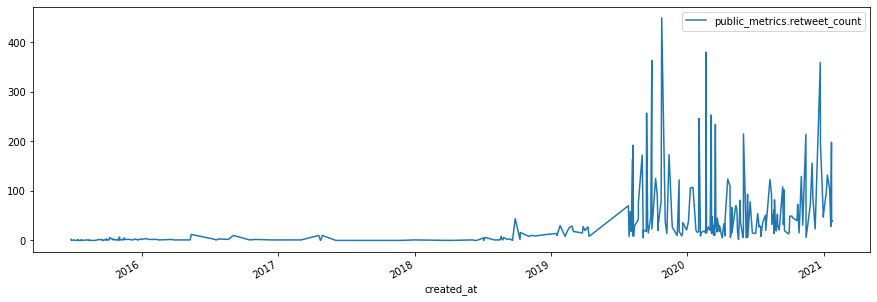

In [50]:
df.plot(x='created_at',y='public_metrics.retweet_count',figsize=(15,5))

### Reply Count over time

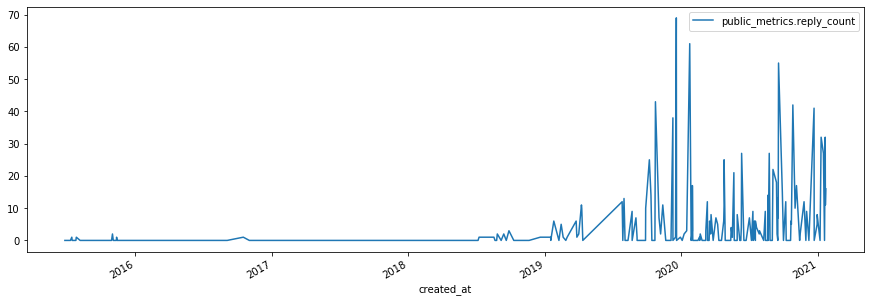

In [52]:
df.plot(x='created_at',y='public_metrics.reply_count',figsize=(15,5))

### Like count over time

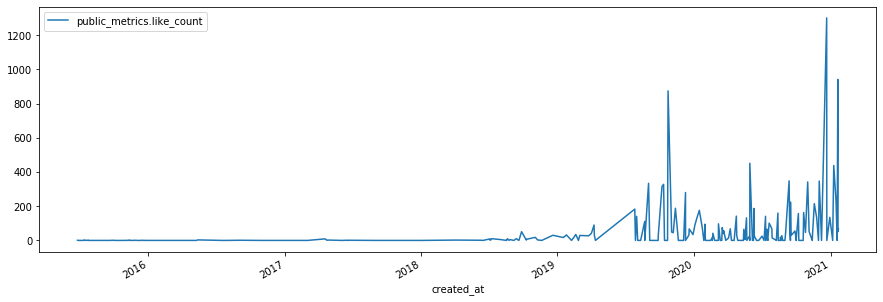

In [53]:
df.plot(x='created_at',y='public_metrics.like_count',figsize=(15,5))

### Quote_count over time

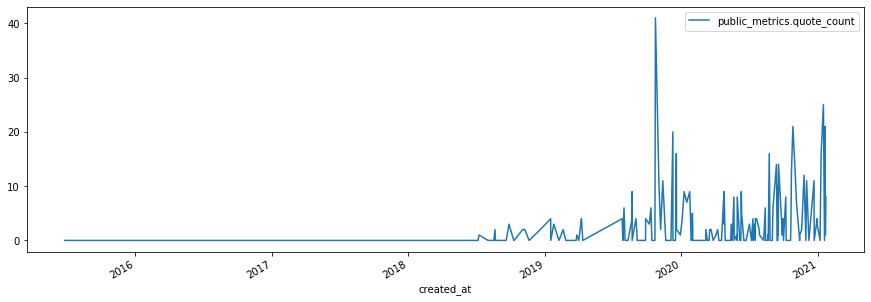

In [54]:
df.plot(x='created_at',y='public_metrics.quote_count',figsize=(15,5))

________